In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('mixed','r',encoding='utf-8') as file:
    raw0 = ' '.join(file.readlines())
raw0[0:200]

'lkkkk “stag lando\n \n \n Chronicles of Avonlea\n by\n Lucy Maud Montgomery\n Part 1 out of 5\n \n     FullBooks.com homepage\n     Index of Chronicles of Avonlea\n     Next part (2)\n \n \n \n \n \n \n \n \n Typed and '

In [80]:
# [needs improvement]
# remove problem characters
import string
#raw0 = raw0.replace(u'’', u"'").replace('”','"').replace('“','"').replace('—','-').replace("‘","'").replace('Æ','AE')
raw0 = raw0.translate(raw0.maketrans("—’‘Æsæíúáâó‚…ë","-''Asaiuaao,_e" ))
raw0 = raw0.translate(raw0.maketrans('”“','""'))

In [81]:
# remove punctuation and numbers & change letters to lowercase
raw1 = raw0.lower()
raw1 = raw1.translate(raw0.maketrans({'\n':None}))
raw1 = raw1.translate(raw1.maketrans(string.punctuation, ' '*len(string.punctuation)))
raw1 = raw1.translate(raw1.maketrans(string.digits, ' '*len(string.digits)))
raw1 = ''.join(filter(lambda x: x.isspace or x.isalpha, raw1))
raw1[0:2000]

'lkkkk  stag lando   chronicles of avonlea by lucy maud montgomery part   out of        fullbooks com homepage     index of chronicles of avonlea     next part             typed and corrected by kjell nedrelid  last modified              dd mm yyyy  uncorrected version released to internet             this version released             you can freely distribute this text in any form as long as you don t get paid for it  please include this short header       the boys  life of abraham lincoln by helen nicolay part   out of        fullbooks com homepage     index of the boys  life of abraham lincoln     next part             scanned by dianne bean of phoenix  arizona    chronicles of avonlea by lucy maud montgomery part   out of        fullbooks com homepage     index of chronicles of avonlea     previous part        and i ll be as amiable as i know how  but since you have gone to the trouble of getting my supper for me  nancy  you must stay and help me eat it  them strawberries look good

In [82]:
len(raw1)

17068935

In [83]:
# split text into a words list and remove repeating words
raw2 = list(set(raw1.split()))
raw2.sort()
raw2[0:5]

['a', 'aa', 'aaa', 'aah', 'aahed']

In [84]:
# remove all but the 5-letter words
raw2copy  = raw2.copy()
for word in raw2copy:
    if len(word) != 5:
        raw2.remove(word)
raw2[0:5]

['aahed', 'aalii', 'aargh', 'aaron', 'abaca']

In [85]:
# a side step to determine letter frequencies only in 5 letter words
five_letter_words_text = ''.join(raw2)
five_letter_words_text[0:100]

'aahedaaliiaarghaaronabacaabaciabackabadaabaffabaftabahtabakaabamaabampabanaabandabaseabashabaskabate'

In [86]:
freqs5 = {}
for letter in string.ascii_lowercase:
    freqs5[letter] = float("{:.2f}".format(100*five_letter_words_text.count(letter)/len(five_letter_words_text)))
freqs5

{'a': 10.78,
 'b': 2.66,
 'c': 3.37,
 'd': 3.54,
 'e': 9.79,
 'f': 1.51,
 'g': 2.46,
 'h': 3.07,
 'i': 6.43,
 'j': 0.51,
 'k': 2.17,
 'l': 5.33,
 'm': 3.17,
 'n': 5.1,
 'o': 6.53,
 'p': 2.83,
 'q': 0.17,
 'r': 6.46,
 's': 8.06,
 't': 5.18,
 'u': 4.16,
 'v': 1.09,
 'w': 1.44,
 'x': 0.45,
 'y': 3.06,
 'z': 0.68}

In [87]:
# create a letter frequency dictionary based on
# http://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html
freqs = {
    'e':12.02,
    't':9.10,
    'a':8.12,
    'o':7.68,
    'i':7.31,
    'n':6.95,
    's':6.28,
    'r':6.02,
    'h':5.92,
    'd':4.32,
    'l':3.98,
    'u':2.88,
    'c':2.71,
    'm':2.61,
    'f':2.30,
    'y':2.11,
    'w':2.09,
    'g':2.03,
    'p':1.82,
    'b':1.49,
    'v':1.11,
    'k':0.69,
    'x':0.17,
    'q':0.11,
    'j':0.10,
    'z':0.07
}

In [88]:
# compare the 'all words' frequencywith the 'five letter words' frequency
for letter in freqs:
    print(f'{letter} : {round(freqs5[letter]/freqs[letter],3)}')

e : 0.814
t : 0.569
a : 1.328
o : 0.85
i : 0.88
n : 0.734
s : 1.283
r : 1.073
h : 0.519
d : 0.819
l : 1.339
u : 1.444
c : 1.244
m : 1.215
f : 0.657
y : 1.45
w : 0.689
g : 1.212
p : 1.555
b : 1.785
v : 0.982
k : 3.145
x : 2.647
q : 1.545
j : 5.1
z : 9.714


In [89]:
# create a 'words' dataframe
words_df = pd.DataFrame(data = {'words':raw2})
words_df.head(2)

,words
0,aahed
1,aalii


In [90]:
# create a 'frequency score' column
# for each word all letters' frequency values are added to get the word's score

# single & double quotes are to be dealt with
def freq_sum(word):
    score = 0
    for letter in word:
        try:
            score = score + freqs[letter]
        except KeyError:
            pass
    return float("{:.3f}".format(score))

words_df['frequency score'] = words_df['words'].apply(freq_sum)
words_df.head(3)

,words,frequency score
0,aahed,38.50
1,aalii,34.84
2,aargh,30.21


In [91]:
# create a 'freq5 score' column but use the freq5 values
def freq5_sum(word):
    score = 0
    for letter in word:
        try:
            score = score + freqs5[letter]
        except KeyError:
            pass
    return float("{:.2f}".format(score))

words_df['freq5 score'] = words_df['words'].apply(freq5_sum)
words_df.head(2)

,words,frequency score,freq5 score
0,aahed,38.50,37.96
1,aalii,34.84,39.75


In [92]:
# create a 'vowel count' column
# count the number of vowels in the word
vowels = 'aeiou'
def count_vowels(word):
    fraction = 0
    for letter in word:
        if letter in vowels:
            fraction +=1
    return fraction
words_df['vowels count'] = words_df['words'].apply(count_vowels)
words_df.head(2)

,words,frequency score,freq5 score,vowels count
0,aahed,38.50,37.96,3
1,aalii,34.84,39.75,4


In [93]:
# create a 'letters' that will list all letters in the word alphabetically
# this will be useful when choosing words with the same letters but at different positions
def list_letters(word):
    return sorted((set(word)))
words_df['letters'] = words_df['words'].apply(list_letters)
words_df.head()

,words,frequency score,freq5 score,vowels count,letters
0,aahed,38.50,37.96,3,"[a, d, e, h]"
1,aalii,34.84,39.75,4,"[a, i, l]"
2,aargh,30.21,33.55,2,"[a, g, h, r]"
3,aaron,36.89,39.65,3,"[a, n, o, r]"
4,abaca,28.56,38.37,3,"[a, b, c]"


In [94]:
# create a 'repeating letters' column
# return a list of tupples of the form (letter, repetitions)
def repeating_letters(word):
    if len(set(word)) == len(word):
        return 'no repeats'
    repetitions = []
    for letter in word:
        if word.count(letter)>1:
            repetitions.append((letter,word.count(letter)))
    return list(set(repetitions))[0]
            
words_df['repeating letters'] = words_df['words'].apply(repeating_letters)
words_df.head(2)

,words,frequency score,freq5 score,vowels count,letters,repeating letters
0,aahed,38.50,37.96,3,"[a, d, e, h]","(a, 2)"
1,aalii,34.84,39.75,4,"[a, i, l]","(i, 2)"


In [95]:
# top scoring words
words_df[words_df['repeating letters']=="no repeats"].sort_values('frequency score',ascending = False).head()

,words,frequency score,freq5 score,vowels count,letters,repeating letters
10173,oaten,43.87,37.38,3,"[a, e, n, o, t]",no repeats
1093,atone,43.87,37.38,3,"[a, e, n, o, t]",no repeats
4727,entia,43.50,37.28,3,"[a, e, i, n, t]",no repeats
14380,teian,43.50,37.28,3,"[a, e, i, n, t]",no repeats
14649,tinea,43.50,37.28,3,"[a, e, i, n, t]",no repeats


In [96]:
# creating an empty table of all letters and all positions
letters_df = pd.DataFrame(data = np.zeros((5,26), dtype=int), index = [1,2,3,4,5], columns=list(string.ascii_lowercase))

In [97]:
# count the number of appearances of each letter on each position
for i in range(5):
    for word in words_df.words:
        letters_df.loc[i+1, str(word[i])] += 1

In [109]:
letters_df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
1,1266,1177,1216,821,456,693,773,631,319,309,...,85,706,1863,1008,337,293,475,30,169,142
2,3023,120,262,146,2104,41,109,752,1736,20,...,21,1178,189,327,1431,83,178,77,287,49
3,1518,487,545,551,1062,201,479,262,1312,57,...,27,1624,711,802,800,298,283,129,229,171
4,1788,304,546,555,2602,215,486,313,1383,38,...,3,890,741,1050,720,205,161,18,163,133
5,1345,118,223,860,1897,104,197,590,579,2,...,3,956,3184,1105,164,24,94,116,1691,70


In [110]:
# normalize for each letter
sums = pd.Series(letters_df.sum(axis=0))
best_pos_for_letter = round(100*letters_df/sums,1)
best_pos_for_letter

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
1,14.2,53.4,43.6,28.0,5.6,55.3,37.8,24.8,6.0,72.5,...,61.2,13.2,27.9,23.5,9.8,32.4,39.9,8.1,6.7,25.1
2,33.8,5.4,9.4,5.0,25.9,3.3,5.3,29.5,32.6,4.7,...,15.1,22.0,2.8,7.6,41.5,9.2,14.9,20.8,11.3,8.7
3,17.0,22.1,19.5,18.8,13.1,16.0,23.4,10.3,24.6,13.4,...,19.4,30.3,10.6,18.7,23.2,33.0,23.8,34.9,9.0,30.3
4,20.0,13.8,19.6,18.9,32.0,17.1,23.8,12.3,26.0,8.9,...,2.2,16.6,11.1,24.5,20.9,22.7,13.5,4.9,6.4,23.5
5,15.0,5.3,8.0,29.3,23.4,8.3,9.6,23.2,10.9,0.5,...,2.2,17.9,47.6,25.7,4.8,2.7,7.9,31.4,66.6,12.4


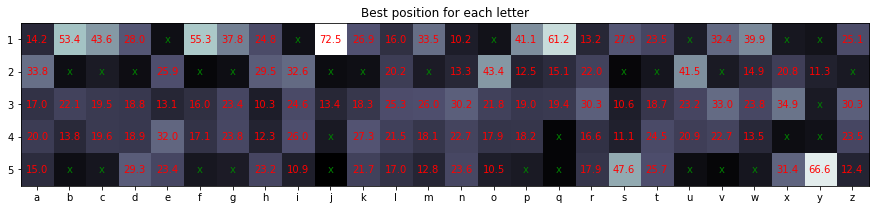

In [127]:
# plot heatmap of the best position for each letter
plt.rcParams["figure.figsize"] = (20,3)

fig, ax = plt.subplots()
im = ax.imshow(best_pos_for_letter, cmap='bone')
ax.set_xticks(np.arange(26), labels=string.ascii_lowercase)
ax.set_yticks(np.arange(5), labels='12345')

# only accent on positions where the appearance is larger than average (100% / 5 = 20%)
for i in range(len('12345')):
    for j in range(len(string.ascii_lowercase)):
        if best_pos_for_letter.iloc[i,j] > 20:
            text = ax.text(j, i, best_pos_for_letter.iloc[i,j], ha="center", va="center", color="r")
        else:
            text = ax.text(j, i, 'x', ha="center", va="center", color="g")

plt.title( "Best position for each letter" )
plt.show()

In [123]:
# analogical chart for 'best letter for each position'
# normalize for each position
sums = pd.Series(letters_df.sum(axis=1))
best_letter_for_pos = round(100*letters_df/sums.to_list()[0],1)
best_letter_for_pos

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
1,7.6,7.1,7.3,4.9,2.7,4.2,4.7,3.8,1.9,1.9,...,0.5,4.3,11.2,6.1,2.0,1.8,2.9,0.2,1.0,0.9
2,18.2,0.7,1.6,0.9,12.7,0.2,0.7,4.5,10.5,0.1,...,0.1,7.1,1.1,2.0,8.6,0.5,1.1,0.5,1.7,0.3
3,9.2,2.9,3.3,3.3,6.4,1.2,2.9,1.6,7.9,0.3,...,0.2,9.8,4.3,4.8,4.8,1.8,1.7,0.8,1.4,1.0
4,10.8,1.8,3.3,3.3,15.7,1.3,2.9,1.9,8.3,0.2,...,0.0,5.4,4.5,6.3,4.3,1.2,1.0,0.1,1.0,0.8
5,8.1,0.7,1.3,5.2,11.4,0.6,1.2,3.6,3.5,0.0,...,0.0,5.8,19.2,6.7,1.0,0.1,0.6,0.7,10.2,0.4


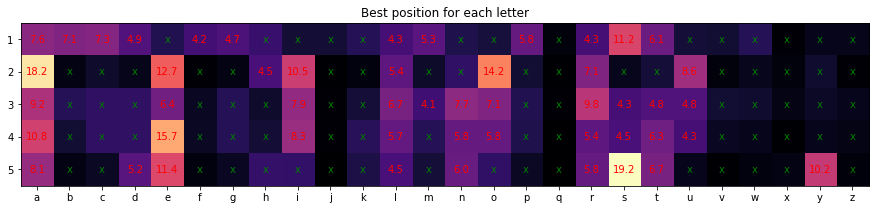

In [125]:
# plot heatmap of the best letter for each position
plt.rcParams["figure.figsize"] = (20,3)

fig, ax = plt.subplots()
im = ax.imshow(best_letter_for_pos, cmap='magma')
ax.set_xticks(np.arange(26), labels=string.ascii_lowercase)
ax.set_yticks(np.arange(5), labels='12345')

# only accent on positions where the appearance is larger than average (100% / 5 = 20%)
for i in range(len('12345')):
    for j in range(len(string.ascii_lowercase)):
        if best_letter_for_pos.iloc[i,j] > 100/26:
            text = ax.text(j, i, best_letter_for_pos.iloc[i,j], ha="center", va="center", color="r")
        else:
            text = ax.text(j, i, 'x', ha="center", va="center", color="g")

plt.title( "Best position for each letter" )
plt.show()